In [27]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Investigate Meta Data Field

In [17]:
meta_dir = '.\\'

In [20]:
meta_files = glob.glob("*_text_meta_*.txt")
meta_file_list = []
for meta_file in meta_files:
    df = pd.read_table(meta_file,index_col=None, header=0)
    meta_file_list.append(df)
    
print meta_files
meta_frame = pd.concat(meta_file_list)

[           ID  Fwy Dir  District  County     City State_PM  Abs_PM   Latitude  \
0     1100313    5   N        11      73  66000.0  R22.324  22.215  32.791540   
1     1100323    5   N        11      73  66000.0  R34.142  34.033  32.950106   
2     1100326    5   N        11      73  66000.0  R36.232  36.123  32.979357   
3     1100330    5   N        11      73  66000.0   R37.37  37.261  32.995494   
4     1100333    5   N        11      73  22678.0   R38.54  38.431  33.010364   
5     1100340    5   N        11      73  11194.0  R47.165  47.056  33.123940   
6     1100348    5   S        11      73  66000.0  R18.931  18.822  32.746784   
7     1100353    5   S        11      73  66000.0  R22.082  21.973  32.788012   
8     1100363    5   S        11      73  66000.0   R26.73  26.621  32.848532   
9     1100369    5   S        11      73  66000.0  R28.464  28.355  32.872590   
10    1100372    5   S        11      73  66000.0  R32.805  32.663  32.930855   
11    1100377    5   S     

In [21]:
# sanity check to ensure files have been found
meta_matches[:5]

['./d11_text_meta_2015_12_17.txt']

In [32]:
# check for duplicate ID values.
meta_frame[meta_frame.ID.duplicated() == True]

,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4


In [24]:
meta_frame.columns

Index([u'ID', u'Fwy', u'Dir', u'District', u'County', u'City', u'State_PM',
       u'Abs_PM', u'Latitude', u'Longitude', u'Length', u'Type', u'Lanes',
       u'Name', u'User_ID_1', u'User_ID_2', u'User_ID_3', u'User_ID_4'],
      dtype='object')

In [26]:
# the type in the meta data are just the detector types.  Need to analyze the "change" that cohort 1 referred to
meta_frame[['ID','Type']] # TODO: assuming meta and 5min agree on freeway type...check?

,ID,Type
0,1100313,FR
1,1100323,FR
2,1100326,FR
3,1100330,FR
4,1100333,FR
5,1100340,FR
6,1100348,FR
7,1100353,FR
8,1100363,FR
9,1100369,FR


# load 5 min data

In [ ]:
# 12 base fields
# 5 fields per lane
# 8 lanes
# 40 + 12

# File has 52

In [2]:
# need to come up with dynamic way of doing this
five_min_base_header = ['Timestamp', 'Station', 'District', 'Freeway #', 'Direction', 'Lane Type', 'Station Length',
                        'Samples', '% Observed', 'Total Flow', 'Avg Occupancy', 'Avg Speed']
five_min_extra_header = ['Lane %s Samples', 'Lane %s Flow', 'Lane %s Avg Occ', 'Lane %s Avg Speed', 'Lane %s Observed']
header = five_min_base_header
max_lanes = 8
for i in range(1, max_lanes + 1):
    new_header = [item % i for item in five_min_extra_header]
    header += new_header
    
print header

['Timestamp', 'Station', 'District', 'Freeway #', 'Direction', 'Lane Type', 'Station Length', 'Samples', '% Observed', 'Total Flow', 'Avg Occupancy', 'Avg Speed', 'Lane 1 Samples', 'Lane 1 Flow', 'Lane 1 Avg Occ', 'Lane 1 Avg Speed', 'Lane 1 Observed', 'Lane 2 Samples', 'Lane 2 Flow', 'Lane 2 Avg Occ', 'Lane 2 Avg Speed', 'Lane 2 Observed', 'Lane 3 Samples', 'Lane 3 Flow', 'Lane 3 Avg Occ', 'Lane 3 Avg Speed', 'Lane 3 Observed', 'Lane 4 Samples', 'Lane 4 Flow', 'Lane 4 Avg Occ', 'Lane 4 Avg Speed', 'Lane 4 Observed', 'Lane 5 Samples', 'Lane 5 Flow', 'Lane 5 Avg Occ', 'Lane 5 Avg Speed', 'Lane 5 Observed', 'Lane 6 Samples', 'Lane 6 Flow', 'Lane 6 Avg Occ', 'Lane 6 Avg Speed', 'Lane 6 Observed', 'Lane 7 Samples', 'Lane 7 Flow', 'Lane 7 Avg Occ', 'Lane 7 Avg Speed', 'Lane 7 Observed', 'Lane 8 Samples', 'Lane 8 Flow', 'Lane 8 Avg Occ', 'Lane 8 Avg Speed', 'Lane 8 Observed']


In [3]:
len(header)

52

In [4]:
!pwd

/Users/bohr/workspace/capstone/DSE_Cohort2_Traffic_Capstone/sensor_health


False

In [7]:
five_min_files = glob.glob("../../cohort2/output_unzipped/station_5min/2016/d11/*_text_station_5min_2016_01*.txt")
print five_min_files[0:5]
five_min_file_list = []
total = len(five_min_files)
for index in range(0, total):
    five_min_file = five_min_files[index]
    if index % (total/10) == 0:
        print "{0:.2f}".format(index/float(total))
    df = pd.read_csv(five_min_file,index_col=None, header=None, names=header)
    five_min_file_list.append(df)
    
five_min_frame = pd.concat(five_min_file_list)

['../../cohort2/output_unzipped/station_5min/2016/d11/d11_text_station_5min_2016_01_01.txt', '../../cohort2/output_unzipped/station_5min/2016/d11/d11_text_station_5min_2016_01_02.txt', '../../cohort2/output_unzipped/station_5min/2016/d11/d11_text_station_5min_2016_01_03.txt', '../../cohort2/output_unzipped/station_5min/2016/d11/d11_text_station_5min_2016_01_04.txt', '../../cohort2/output_unzipped/station_5min/2016/d11/d11_text_station_5min_2016_01_05.txt']
0.00
0.07
0.14
0.21
0.28
0.34
0.41
0.48
0.55
0.62
0.69
0.76
0.83
0.90
0.97


In [8]:
# if % Observed != 100 then some of the data is imputed
# there are specific columns that designate which columns are imputed
five_min_frame.head().T

,0,1,2,3,4
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1100313,1100323,1100326,1100330,1100333
District,11,11,11,11,11
Freeway #,5,5,5,5,5
Direction,N,N,N,N,N
Lane Type,FR,FR,FR,FR,FR
Station Length,NaN,NaN,NaN,NaN,NaN
Samples,10,20,20,20,10
% Observed,100,0,100,100,100
Total Flow,8,NaN,12,12,4


In [10]:
# the lane types found in the 1st month of data
# - CD (Coll/Dist) <-- only 1 so don't care...
# - CH (Conventional Highway)
# - FF (Fwy-Fwy connector)
# - FR (Off Ramp)
# - HV (HOV)
# - ML (Mainline)
# - OR (On Ramp)
five_min_frame['Lane Type'].unique()

array(['FR', 'ML', 'OR', 'HV', 'FF', 'CH', 'CD'], dtype=object)

In [ ]:
# look at each of the freeway types to learn more about which fields are used when...

# Fields vs Freeway Type
Looks like all of the fields in the 5 min data don't relate to all of the freeway types equally.

Types that don't include Occupancy, Speed, Station Length
CH
FR
OR

Types that don't include Speed, Station Length
FF

Types that include Occupancy and Speed data (ie: have all field types)
ML, HV

Note: Lane N Observed is a 0 when no data exists for the lane, unlike other fields which are "blank" and therefore NaN

In [15]:
five_min_frame[five_min_frame['Lane Type'] == 'CH'].head().T

,535,652,1009,1153,1154
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1111515,1113641,1119449,1121657,1121663
District,11,11,11,11,11
Freeway #,8,78,78,67,67
Direction,W,E,W,N,S
Lane Type,CH,CH,CH,CH,CH
Station Length,NaN,NaN,NaN,NaN,NaN
Samples,20,10,30,0,0
% Observed,100,50,100,0,0
Total Flow,25,15,35,NaN,NaN


In [16]:
five_min_frame[five_min_frame['Lane Type'] == 'FF'].head().T

,440,578,592,593,596
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1108675,1113026,1113254,1113258,1113270
District,11,11,11,11,11
Freeway #,15,5,805,805,94
Direction,N,S,S,N,E
Lane Type,FF,FF,FF,FF,FF
Station Length,NaN,NaN,NaN,NaN,NaN
Samples,20,0,20,20,20
% Observed,100,0,50,50,100
Total Flow,6,NaN,6,4,17


In [13]:
five_min_frame[five_min_frame['Lane Type'] == 'FR'].head().T

,0,1,2,3,4
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1100313,1100323,1100326,1100330,1100333
District,11,11,11,11,11
Freeway #,5,5,5,5,5
Direction,N,N,N,N,N
Lane Type,FR,FR,FR,FR,FR
Station Length,NaN,NaN,NaN,NaN,NaN
Samples,10,20,20,20,10
% Observed,100,0,100,100,100
Total Flow,8,NaN,12,12,4


In [17]:
five_min_frame[five_min_frame['Lane Type'] == 'HV'].head().T

,219,851,1000,1012,1069
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1108436,1115829,1119284,1119532,1120107
District,11,11,11,11,11
Freeway #,5,15,5,5,5
Direction,N,N,S,S,N
Lane Type,HV,HV,HV,HV,HV
Station Length,0.609,1.347,0.784,0.901,1.048
Samples,10,20,10,10,10
% Observed,100,100,100,100,100
Total Flow,0,7,3,1,0


In [14]:
five_min_frame[five_min_frame['Lane Type'] == 'ML'].head().T

,86,87,89,91,93
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1108148,1108285,1108287,1108289,1108291
District,11,11,11,11,11
Freeway #,15,94,94,94,94
Direction,S,W,W,W,W
Lane Type,ML,ML,ML,ML,ML
Station Length,0.513,0.313,0.319,0.319,0.206
Samples,60,40,40,40,50
% Observed,100,100,100,100,100
Total Flow,72,59,50,62,69


In [18]:
five_min_frame[five_min_frame['Lane Type'] == 'OR'].head().T

,88,90,92,94,96
Timestamp,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00,01/01/2016 00:00:00
Station,1108286,1108288,1108290,1108292,1108294
District,11,11,11,11,11
Freeway #,94,94,94,94,94
Direction,W,W,W,W,W
Lane Type,OR,OR,OR,OR,OR
Station Length,NaN,NaN,NaN,NaN,NaN
Samples,10,10,20,10,10
% Observed,100,100,100,100,100
Total Flow,1,1,19,5,7


# Investigate how many stations have imputed data

In [20]:
five_min_frame['% Observed'].value_counts()

100    9513943
0      1671940
50      315441
75      199656
67       59359
80       56040
40       22452
83       18372
60       15913
25        9256
33        5367
17        2767
86        1721
20        1021
Name: % Observed, dtype: int64

In [39]:
data = five_min_frame['% Observed'].value_counts()
data.sort_index(ascending=False, inplace=True)

In [41]:
total = data.sum()
print "total: %s" % total
data2 = data / total
observed_data = pd.concat([data, data2], axis=1)
observed_data.columns = ['% Observed #', '% Observed percent']
print observed_data

total: 11893248
     % Observed #  % Observed percent
100       9513943            0.799945
86           1721            0.000145
83          18372            0.001545
80          56040            0.004712
75         199656            0.016787
67          59359            0.004991
60          15913            0.001338
50         315441            0.026523
40          22452            0.001888
33           5367            0.000451
25           9256            0.000778
20           1021            0.000086
17           2767            0.000233
0         1671940            0.140579


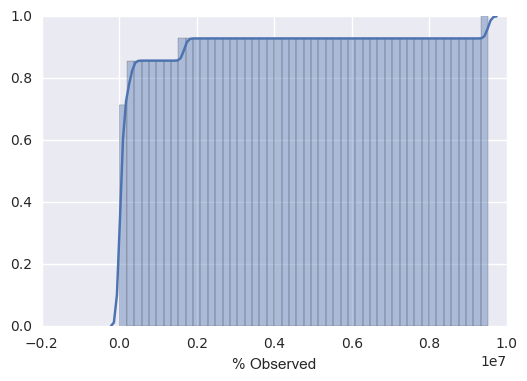

In [44]:
# CDF of the above
sns.distplot(data,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [92]:
# check for missing files through the year.
days_in_year = 365
days_in_leap = days_in_year + 1
leap_year = [2008, 2012, 2016]
base_path = '/Users/bohr/workspace/capstone/cohort2/output/station_5min/2016'
districts = ['d10', 'd11', 'd12', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
for district in districts:
    full_path = base_path + '/' + district
    num_files = len([f for f in os.listdir(full_path) if os.path.isfile(os.path.join(full_path, f))])
    print "district: %s num_files: %s percent: %s" % (district, num_files, num_files/float(days_in_leap))

district: d10 num_files: 364 percent: 0.994535519126
district: d11 num_files: 364 percent: 0.994535519126
district: d12 num_files: 364 percent: 0.994535519126
district: d3 num_files: 364 percent: 0.994535519126
district: d4 num_files: 364 percent: 0.994535519126
district: d5 num_files: 364 percent: 0.994535519126
district: d6 num_files: 364 percent: 0.994535519126
district: d7 num_files: 364 percent: 0.994535519126
district: d8 num_files: 364 percent: 0.994535519126


# Check to see how many stations are always down

In [45]:
five_min_frame.columns

Index([u'Timestamp', u'Station', u'District', u'Freeway #', u'Direction',
       u'Lane Type', u'Station Length', u'Samples', u'% Observed',
       u'Total Flow', u'Avg Occupancy', u'Avg Speed', u'Lane 1 Samples',
       u'Lane 1 Flow', u'Lane 1 Avg Occ', u'Lane 1 Avg Speed',
       u'Lane 1 Observed', u'Lane 2 Samples', u'Lane 2 Flow',
       u'Lane 2 Avg Occ', u'Lane 2 Avg Speed', u'Lane 2 Observed',
       u'Lane 3 Samples', u'Lane 3 Flow', u'Lane 3 Avg Occ',
       u'Lane 3 Avg Speed', u'Lane 3 Observed', u'Lane 4 Samples',
       u'Lane 4 Flow', u'Lane 4 Avg Occ', u'Lane 4 Avg Speed',
       u'Lane 4 Observed', u'Lane 5 Samples', u'Lane 5 Flow',
       u'Lane 5 Avg Occ', u'Lane 5 Avg Speed', u'Lane 5 Observed',
       u'Lane 6 Samples', u'Lane 6 Flow', u'Lane 6 Avg Occ',
       u'Lane 6 Avg Speed', u'Lane 6 Observed', u'Lane 7 Samples',
       u'Lane 7 Flow', u'Lane 7 Avg Occ', u'Lane 7 Avg Speed',
       u'Lane 7 Observed', u'Lane 8 Samples', u'Lane 8 Flow',
       u'Lane 8 Avg O

In [47]:
five_min_by_station = five_min_frame[['Station', '% Observed', 'Timestamp']].set_index(['Station'])\
    .groupby(level=0)

In [48]:
station_observed = five_min_by_station.mean()

In [53]:
total = station_observed.count()
always_down = station_observed[station_observed['% Observed'] == 0].count()
print always_down
print "percentage always down: %s" % (always_down/float(total)*100)

% Observed    73
dtype: int64
percentage always down: % Observed    5.126404
dtype: float64
